# Adaptive Intelligence COM3240
## Lab 7: Reinforcement Learning

### Learning Outcomes
- Understand how reinforcement learning works.
- Ability to develop a simple reinforcement learning scenario.

What has already been implemented.
* A state $s_t$ at time $t$ is implemented as a randomly generated value $\texttt{Image}$.
* Function $Q\left(s_t,a_t\right)$ is implemented as a 2-element list $\texttt{Qvalue}$.
* The greedy action $a_t=\underset{a}{\arg\max }Q\left ( s_t,a \right )$ is implemented as:
    $Action = \texttt{int(Qvalue[Image, Green] > Qvalue[Image, Red])}$

What must be added to the pre-filled template?
* Implement the selection of the greedy action and a random action:
    Where $\mathbb{A}$ is the set of availaible actions $A: \Omega \rightarrow \mathbb{A}, \omega \in \Omega$
    
    $a=\left\{\begin{matrix}\underset{a}{\arg\max }Q\left ( s_t,a \right ),
 &1-\varepsilon \\
 A\left ( \omega \right ), &\varepsilon
\end{matrix}\right.$
* Implement the way to update $Q$:
    


## Lecture overview

### Reinforcement Learning
Reinforcement learning is learning what to do—how to map situations to actions—so as to maximize a numerical reward signal (Reinforcement Learning: An Introduction by Richard S. Sutton and Andrew G. Barto).
In a typical reinforcement learning scenario a learner (or agent) has to achieve a specific goal by performing correct actions. 

The 'correctness' of an action is estimaded by state-action pair functions which are called value funtions and mathematically are described by the notation .
Alternative, value funtions estimate how good a particular action will be on a given state, under a policy.

<img src="http://bitsandchips.me/COM3240_Adaptive_Intelligence/Lecture7/icons/pic1.png" width="500"/>

How do we stimate $Q(s , a)?$ => We **explore**. How do we choose an action? => **We choose the action that maximizes our reward.**

<img src="http://bitsandchips.me/COM3240_Adaptive_Intelligence/Lecture7/icons/pic2.png" width="500"/>

Exporation vs. exploitation policies (e.g. $\varepsilon$-greedy, soft-max, optimistic greedy).

## Laboratory 7: Reinforcement Learning

### Exercise
A monkey is randomly presented with two alternative images. One shows a balloon and the other a bicycle. In front of the monkey, there are two buttons, one Green and one Red. Every time the balloon is presented and the monkey presses the Green button, it receives a bit of juice (reward). Similarly, if the bicycle is presented and the Red button is pressed, it again receives juice. No other combination is rewarded. In this simple setup, your monkey, child or artificial agent can learn a specific mapping (Balloon− >Green) and (Bicycle− >Red) from rewards.

<img src="http://bitsandchips.me/COM3240_Adaptive_Intelligence/Lecture7/icons/pic2.png" width="500"/>

1. Write code that implements this scenario. The artificial agent may found itself in two states, ”bicycle” or ”balloon”, with equal probabilities. For this reason, you need to use a random generator (rand). From each of the two states, it can choose two actions Red or Green, based on the Q values of the state-action pair. You can use the update rule for Q values we covered in the class in order to learn the optimal actions. Initialise the Qs randomly between 0 and 1 (rand). You can use a Greedy policy. Pre-define the number of consequent presentations (trials). If in difficulties with setting up variables, please ask the demonstrators for help. Note: In order to make the algorithm work, you need to find appropriate parameters. Try different values for the learning rate.
2. Plot the average total reward as a function of the trials. This is the learning curve and successful learning means that the reward increases as the trial number increases (up to a maximum value). If in difficulties with plotting commands, please ask the demonstrators.
3. In order to draw conclusions we need to repeat this procedure many times and show an average learning curve. Repeat the above procedure 10 times and plot the average graph with errorbars (Matlab commands mean and errorbar).
4. The use of an epsilon-greedy policy would make any difference in this case? Modify your code accordingly and explain your results. What is the best value for epsilon in this case and for which reason?
5. The rules of the game change. Initial Q values are set to zero. In case of a wrong response, a small reward of 0.1 is administered. In case of a correct response, a reward of 10 with probability 1/10 is given (i.e. in 1 out of 10 cases). Change your code accordingly. Would you be able to achieve maximum reward with the parameters you have used earlier? If not, how should you change the learning rate and the epsilon parameter?

It is possible to implement your algorithm on an Artificial Neural Network (ANN). To do so, you need to create a representation of the two images as an input vector (say a column vector 2x1; for instance [1 0]’ for Ballon and [0 1]’ for bicycle. Then you have to use a 2x2 weight matrix producing a 2x1 output vector. Use this vector as an input to a sigmoid function and call this result your output V (firing rate of the output (action) neurons). Say for instance that position V(1,1) represents the Q value of Green and V(2,1) represents the Q value of Red.

In this setup, the Q values are updated in an indirect way by modifying accordingly the synaptic weights. It turns out that a rule allowing us to appropriately modify the connections is a hebbian rule with a reward-dependant factor: $\Delta w_{i,j} =  \eta\left[r-Q(s,i)\right]x_ix_j^s$ , where $r$ is the reward $Q(s,i)$ the $Q$  value of state $s$ and action $i$ (the selected action), $x_i$ the activity of the neuron that represents the selected action and $x_j^s$ the j-th presynaptic neuron, where $j$ is an index on the elements of the column input vector. 
_Note_: we assume that  is 1 for the neuron that represents the action we took (and 0 for the others) and NOT its output value.

1. Modify your code in order to you use an ANN and plot the learning curve.
2. Explore the effect of the learning parameters on the performance of your network.


####  Function that returns the rewards for each trial

In [1]:
import numpy as np

def monkey_template(nTrials, learningRate, epsilon):

    # expected rewards: initially random
    Qvalue = np.random.rand(2, 2)
    
    # actions
    Red = 0
    Green = 1
    
    # inputs (states)
    Balloon = 0
    Bicycle = 1
    
    # output: rewards for each trial
    Rewards = np.zeros((1, nTrials))
    
    for trial in range(nTrials):
        # present a picture / state
        Image = np.random.randint(2) # Half times Balloon, half times Bicycle
                
        # select best current action (Greedy) 
        #turn algorithm into an epsilon-Greedy one
        #(random actions can be selected with a probability = epsilon)
       
        if (np.random.ranf(1) > epsilon):#i.e. 1-\epsilon
            #Select current action
            Action = int(Qvalue[Image, Green] > Qvalue[Image, Red]) # will result Action=1 (Green) if Qvalue(Image,Green) > Qvalue(Image,Red) and Action = 0 (Red)
        else:#i.e. \epsilon
            #Select random action
            Action = print(np.random.choice(2,1))
        
        # Collect reward
        if Image == Balloon and Action == Green:
            r = 1
        elif Image == Bicycle and Action == Red:
            r = 1
        else:
            r = 0

        #update Q values
        Qvalue[Image,Action] = Qvalue[Image,Action] + learningRate*(r - Qvalue[Image,Action])
        
        
        
        
        
        # store reward
        Rewards[0,trial] = r

    return Rewards


#### Script that calls the function `monkey_template`

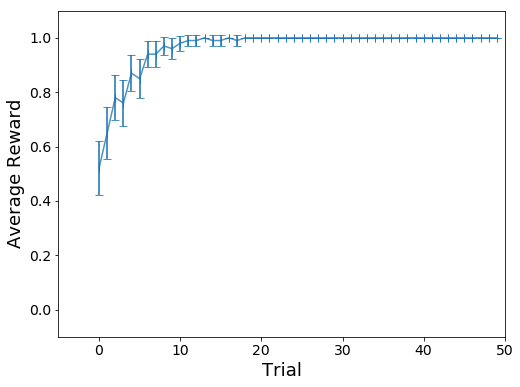

In [2]:
import matplotlib.pyplot as plt

# This script calls the function monkey_template (1 run)
# The code has been developed as a demo, see if you can improve it.
# For instance there is no check whether the parameters are correct or not.


# Parameter setup
nTrials = 50        # should be integer >0
learningRate = 0.5  # should be real, Greater than 0
epsilon = 0.0       # Should be real, Greater or Equal to 0; epsilon=0 Greedy, otherwise epsilon-Greedy

fontSize=18



repetitions = 100   # should be integer, greater than 0; for statistical reasons

totalRewards = np.zeros((repetitions,nTrials))

fontSize = 18

for j in range(repetitions):
    totalRewards[j,:] = monkey_template(nTrials,learningRate,epsilon)

plt.figure(figsize = (8, 6))
means = np.mean(totalRewards, axis = 0)
errors = 2 * np.std(totalRewards, axis = 0)/np.sqrt(repetitions)
plt.errorbar(np.arange(nTrials), means, errors, 0, elinewidth = 2, capsize = 4, alpha =0.8)
plt.xlabel('Trial',fontsize = fontSize)
plt.ylabel('Average Reward',fontsize = fontSize)
plt.axis((-(nTrials/10.0),nTrials,-0.1,1.1))
plt.tick_params(axis = 'both', which='major', labelsize = 14)
plt.show()